**Kaggle Dataset Link:** [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?utm_source=chatgpt.com)

**GitHub Link:** [Predicting-Heart-Disease-Risk-Using-Supervised-Machine-Learning](https://github.com/nushin01/Predicting-Heart-Disease-Risk-Using-Supervised-Machine-Learning)

### Predicting Heart Disease Risk Using Supervised Machine Learning
#### A Binary Classification Approach Using Clinical Data from the UCI Heart Dataset

**Project Overview and Data Selection**

For this supervised learning final project, we selected a real-world binary classification problem: Predicting the presence of heart disease based on clinical and demographic health data. This has significant medical relevance, as early identification of heart conditions can guide timely interventions. We chose the [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?utm_source=chatgpt.com)  dataset from Kaggle (by Redwan Karimsony)
kaggle.com. The dataset is derived from the original UCI Heart Disease dataset and contains the Cleveland subset, which consists of 303 patient records with 14 features.

**Why This Dataset Was Chosen**

**Lightweight:** Only 303 rows and 14 columns, allowing for fast EDA and model experimentation

**Binary Classification Task:** The target or num variable indicates heart disease presence (>0) or absence (0), a clear fit for supervised learning.

**Tabular and Structured:** Provided in CSV format; features include both categorical and numerical data, making it suitable for standard preprocessing pipelines.

**Provenance of the Data**

Source: Kaggle (dataset uploaded by redwankarimsony)
kaggle.com

Original Data: From the UCI Machine Learning Repository, Cleveland Heart Disease dataset

Contributors: Redwan Karimsony (Kaggle uploader), with original data collected by Andras Janosi, William Steinbrunn, Matthias Pfisterer, and Robert Detrano
kaggle.com
archive.ics.uci.edu
kaggle.com

License: Public domain via UCI and openly available on Kaggle for academic use—no restrictions found.

**Method of Data Collection**

The UCI dataset contains clinical data collected by the Cleveland Clinic Foundation. The study involved patients undergoing diagnostic evaluation for suspected heart disease. Clinical measurements were obtained using standard medical procedures including blood pressure readings, serum cholesterol tests, electrocardiograms, and fluoroscopy imaging. Demographic information such as age and sex was recorded for each patient. The dataset reflects a real-world sample of adults evaluated for cardiovascular conditions, with diagnoses made based on clinical examination and diagnostic tests. The original diagnosis variable (num) ranged from 0 to 4 indicating severity but has been re-labeled here as binary for the purposes of this supervised learning classification task.

**Dataset Features**

The dataset contains 14 features capturing clinical and demographic information relevant to heart disease risk:

- age: Age of the patient (years)

- sex: Gender (1 = male; 0 = female)

- cp: Chest pain type (4 categories)

- trestbps: Resting blood pressure (mm Hg)

- chol: Serum cholesterol (mg/dl)

- fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

- restecg: Resting electrocardiographic results (categorical)

- thalach: Maximum heart rate achieved

- exang: Exercise-induced angina (1 = yes; 0 = no)

- oldpeak: ST depression induced by exercise relative to rest

- slope: Slope of the peak exercise ST segment

- ca: Number of major vessels colored by fluoroscopy (0–3)

- thal: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)

- target: Diagnosis of heart disease (0 = no disease, 1 = disease)

**Ethical Considerations and Legality**

- Fully publicly accessible via Kaggle and UCI.

- No copyright restrictions or commercial usage limitations were identified.

- Suitable for inclusion in a publicly shared GitHub repository and video presentation, fulfilling all course and academic standards.



#### Identifying a Supervised Machine Learning Problem

The core objective of this project is to develop a predictive model that can determine whether a patient is likely to have heart disease based on a set of clinical and demographic features. This is framed as a binary classification problem, where the target variable (target) has two classes:

- 1 indicates the presence of heart disease

- 0 indicates no heart disease

This supervised learning task is highly appropriate for the dataset, which provides labeled examples with known outcomes and a manageable number of structured input features.

The goal is to build a custom modeling pipeline that includes thoughtful data preprocessing, feature engineering, and evaluation. Multiple machine learning models will be trained and compared to assess their performance on this classification task. These models includes:

- Logistic Regression

- Decision Trees

- Random Forests

- Tuned Random Forest (via RandomizedSearchCV)

To ensure a rigorous approach, the project will also:

- Perform hyperparameter tuning for selected models

- Use cross-validation for reliable performance estimation

- Evaluate using appropriate classification metrics (e.g., accuracy, precision, recall, F1-score, and ROC-AUC)

- Analyze feature importance and model interpretability

In summary, this project is designed to showcase a well-rounded, end-to-end supervised learning pipeline for medical risk prediction, highlighting not only model performance but also responsible data preprocessing and analytical reasoning.

#### Exploratory Data Analysis (EDA) — Inspect, Visualize, and Clean the Data

***Data Loading and Initial Inspection*** 

To begin the analysis, we load the dataset locally and inspect its structure.

In [51]:
# Importing required libraries
import pandas as pd

# Loading the dataset
df = pd.read_csv('heart_disease_uci.csv')

# Displaying the first five rows of the dataset
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Observation:**

The dataset includes demographic, clinical, and categorical features across 16 columns. The target variable num ranges from 0 to 4, indicating heart disease severity. Features like cp, sex, and thal are categorical, while fbs and exang are boolean. The data appears structured but will require encoding and target binarization for classification.

**Dataset Dimensions and Feature Overview**

In [52]:
# Checking dataset shape and data types
print("Dataset shape:", df.shape)
print("\nData types and null values:")
print(df.info())


Dataset shape: (920, 16)

Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


**Observation:**

The dataset contains 920 rows and 16 columns. Several features have missing values, as shown by non-null counts below 920:

- Features with moderate missingness include: trestbps (861), chol (890), fbs (830), restecg (918), thalch (865), exang (865), and oldpeak (858).

- Features with high missingness are: slope (611), thal (434), and especially ca (309).

The dataset includes both numerical features (int64, float64) and categorical/boolean features (object type).
Addressing these missing values appropriately will be crucial for building robust and accurate supervised learning models.

**Missing Data Visualization and Quantification**

In [53]:
!pip install missingno

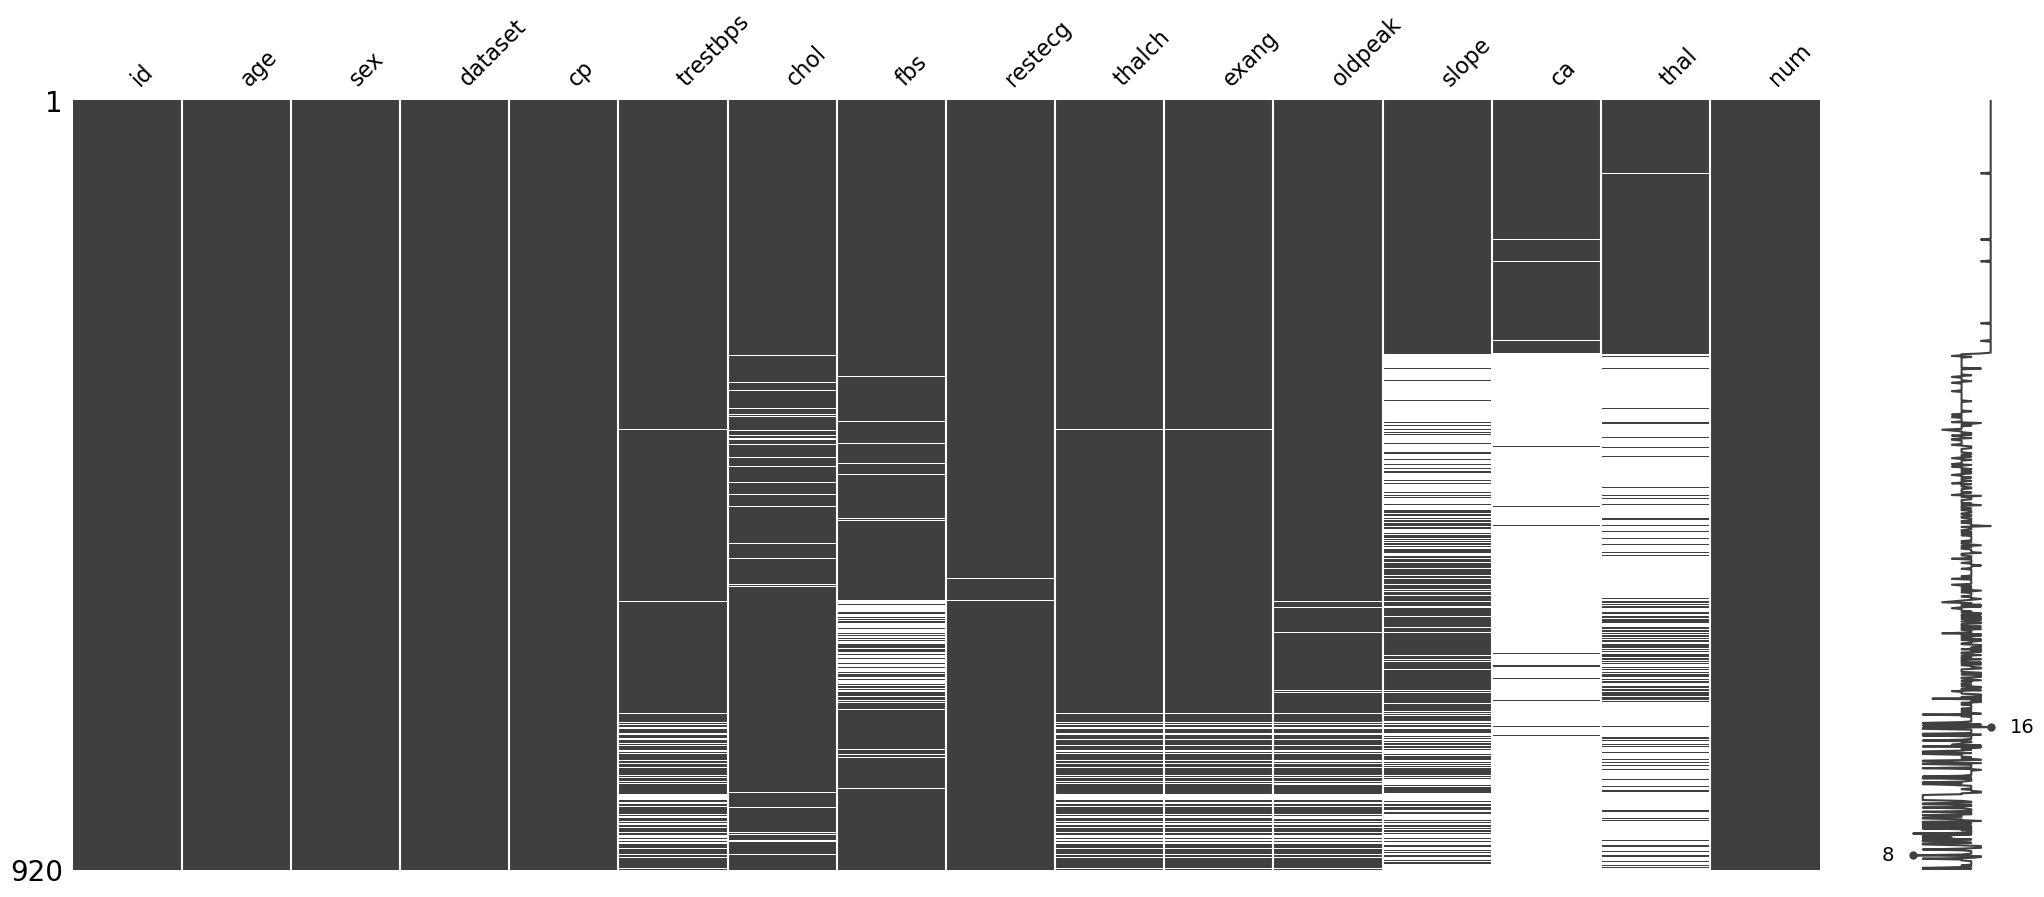

Missing data percentage per column:
 id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


In [54]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualizing missing data matrix
msno.matrix(df)
plt.show()

# Calculating percentage missing per column
missing_percent = df.isnull().mean() * 100
print("Missing data percentage per column:\n", missing_percent)


**Observation:**

The missing data matrix reveals significant missingness, particularly in the slope, ca, and thal columns. The percentage of missing data per column confirms:

- slope: ~33.59% missing

- ca: ~66.41% missing

- thal: ~52.83% missing

All other columns have less than 10% missing values. This distribution informs the imputation strategy, where minor missingness can be addressed using median or mode, while high-missingness features may need special treatment or careful evaluation.

**Statistical Summary of Numerical Features**


In [55]:
df.describe()


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [56]:
print(df.columns.tolist())

['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


**Numerical Features Distribution**


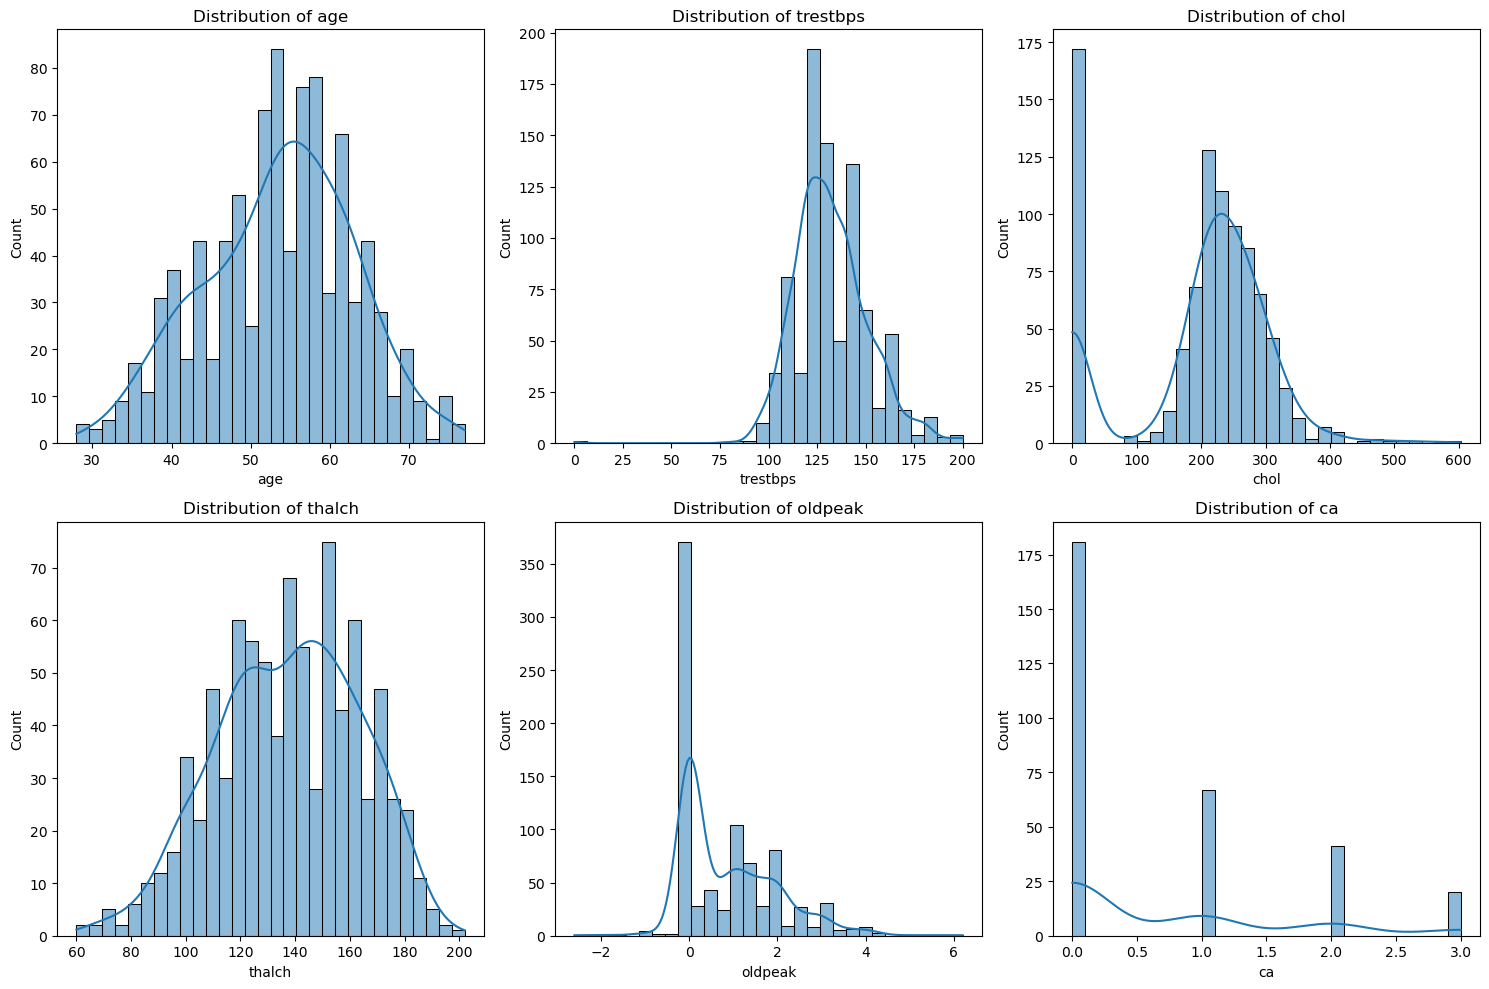

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


**Observation:**

- Age shows a near-normal distribution centered around 54 years.

- Trestbps (resting blood pressure) has a slight right skew; a few patients with very high BP.

- Cholesterol also shows right skew with some high cholesterol outliers.

- Thalach (max heart rate) is fairly symmetric.

- Oldpeak (ST depression) has many zeros and some spread out higher values, indicating some skewness.

- Ca (vessels colored) mostly concentrated at lower values but with some missing values.

**Boxplots to Identify Outliers**

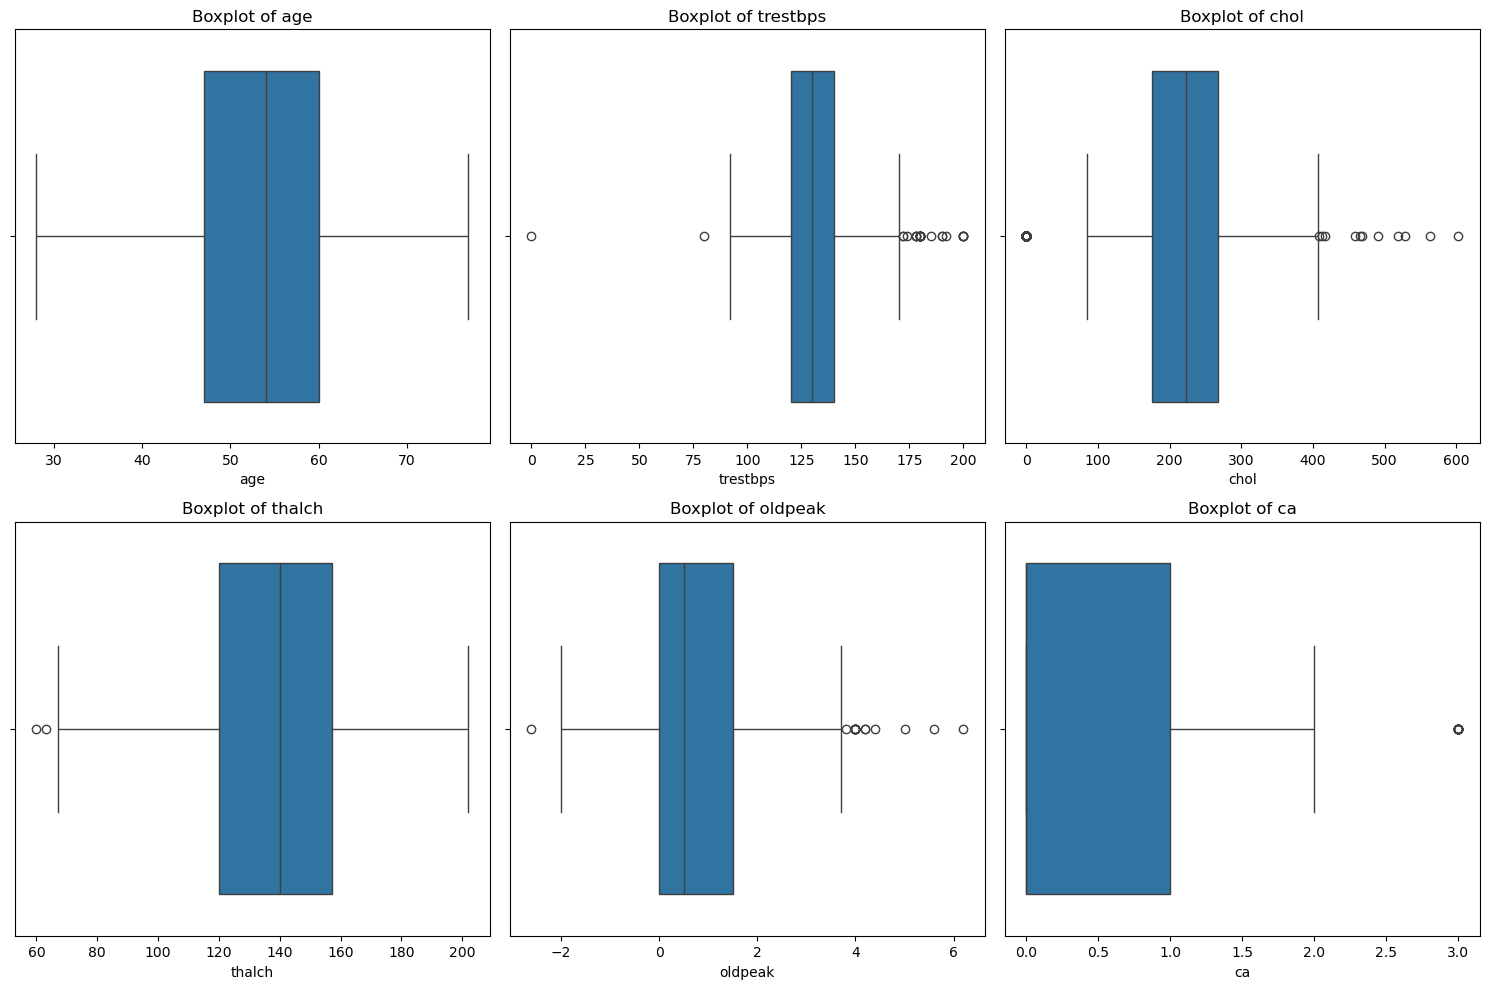

In [58]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


**Observation**

- Outliers visible in chol, trestbps, and oldpeak — may need winsorizing or robust scaling.

- Ca has extreme values but also large missing data, so needs careful imputation.



**Categorical Features Distribution**

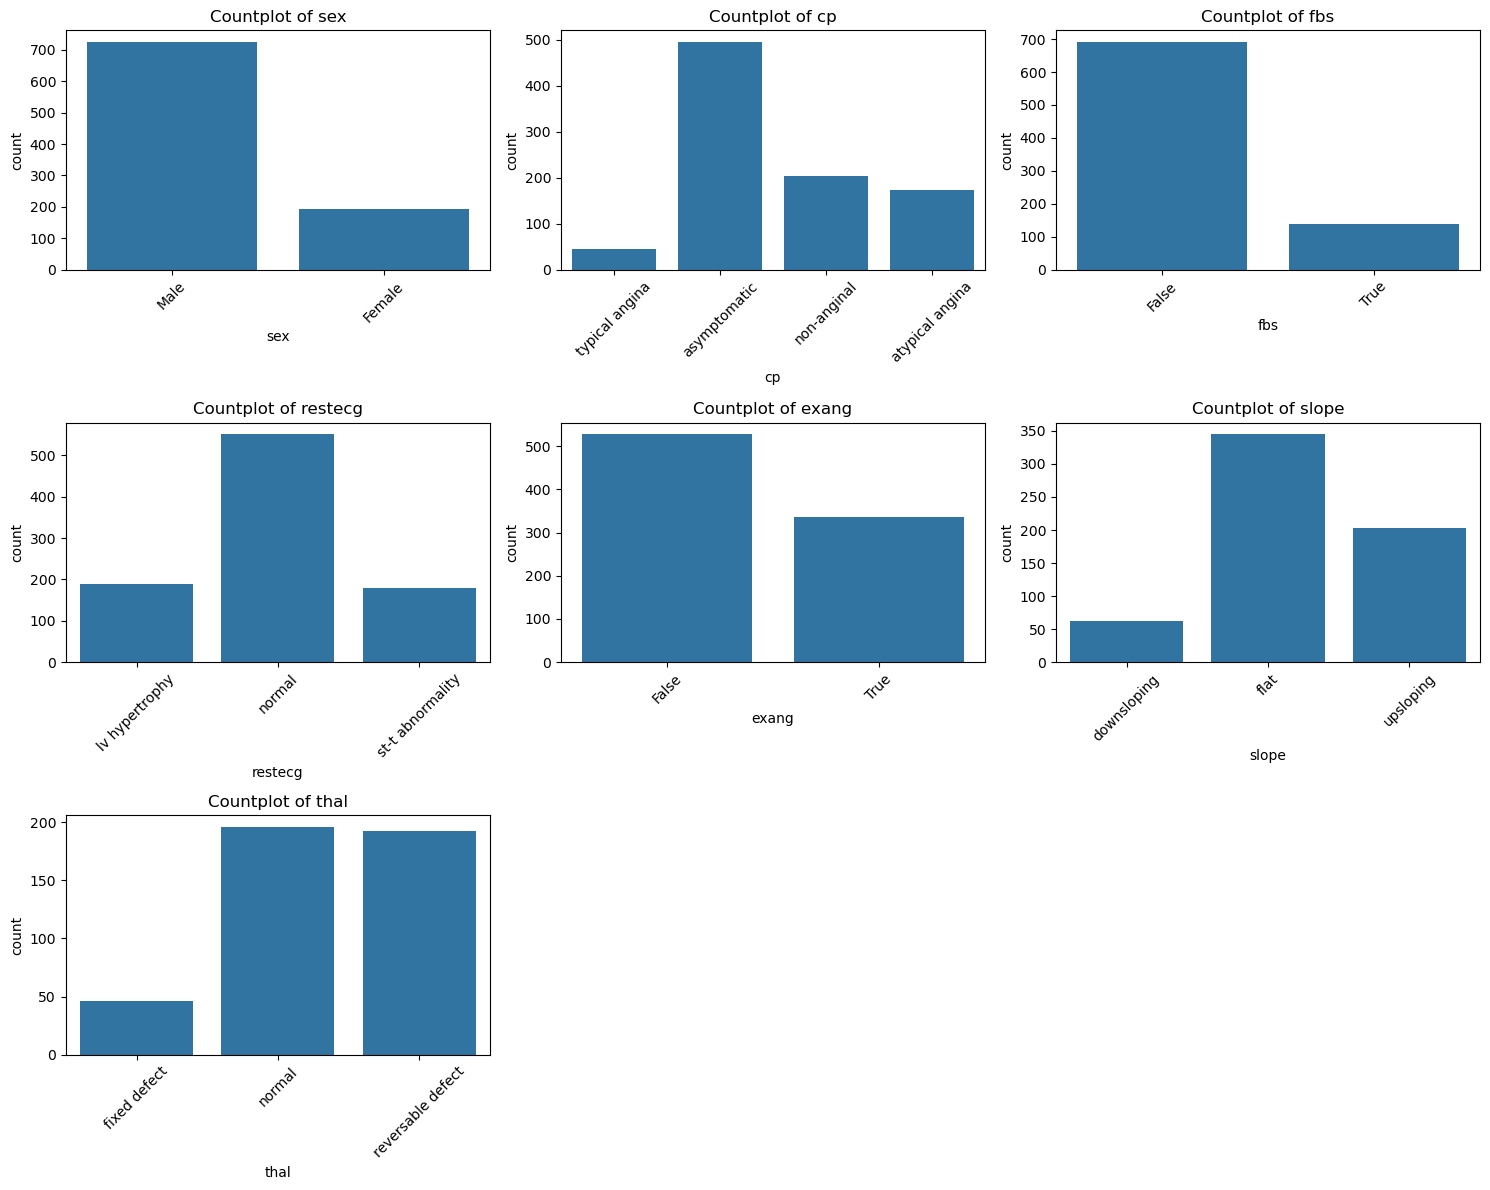

In [59]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

plt.figure(figsize=(15,12))
for i, col in enumerate(cat_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observation:**

- Majority of patients are male.

- Chest pain types vary, with some categories more common.

- Fasting blood sugar mostly false.

- Several categories like slope and thal show imbalance and missing data.

**Correlation Analysis**

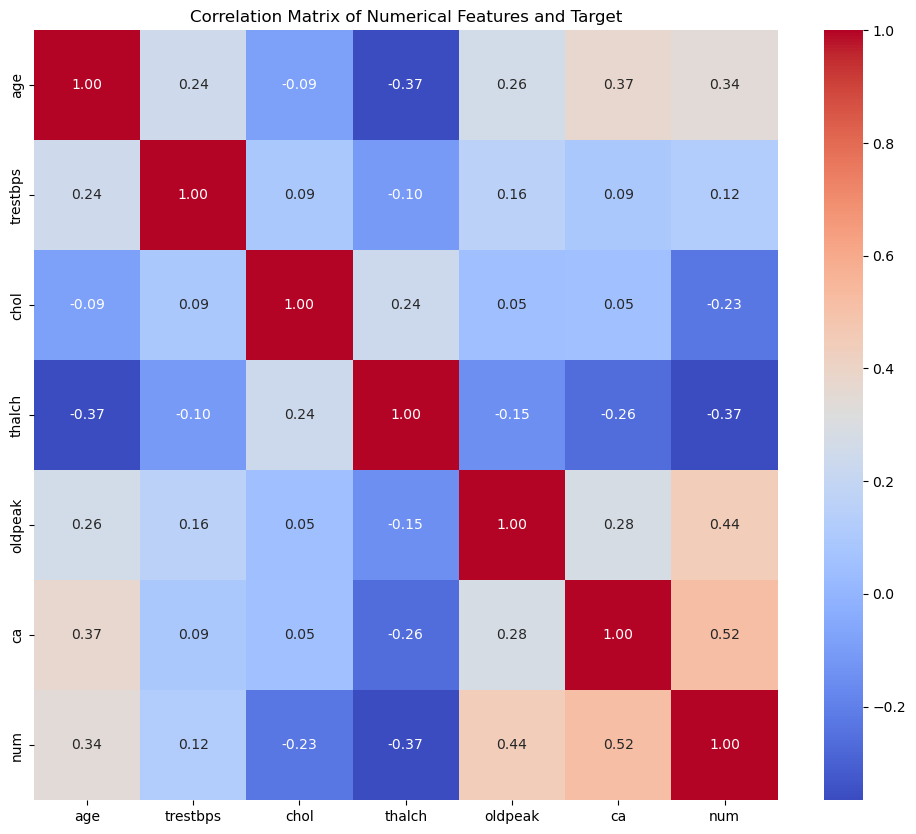

In [60]:
plt.figure(figsize=(12,10))
corr = df[num_features + ['num']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Target')
plt.show()


**Distribution of Binary Target Variable**

/var/folders/8w/phtg9fgx4618skf4j6rd0rmh0000gn/T/ipykernel_3514/2170938282.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


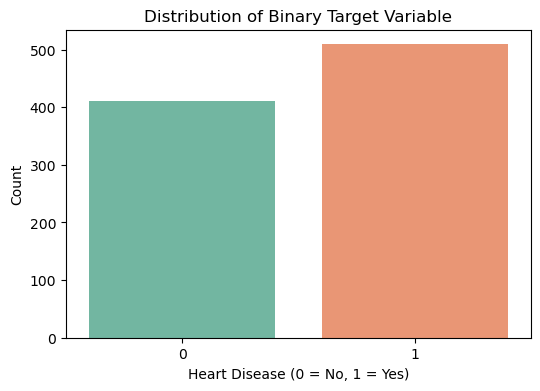

Binary class distribution:
target
1    509
0    411
Name: count, dtype: int64


In [61]:

df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Distribution of Binary Target Variable')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

print("Binary class distribution:")
print(df['target'].value_counts())


**Target Variable Binarization and Class Balance**

The original `num` variable indicated heart disease severity from 0 to 4. For binary classification, we transformed this into a new `target` variable:
- `0`: No heart disease
- `1`: Any level of heart disease

After transformation, the dataset contains:
- 509 records with heart disease (target = 1)
- 411 records without heart disease (target = 0)

This results in a fairly balanced dataset, which is ideal for supervised binary classification.


#### Data Preprocessing and Model Training



In [62]:
#Dropping irrelevant columns
df = df.drop(columns=['id', 'dataset', 'num'])  


In [63]:
#Handling missing values

from sklearn.impute import SimpleImputer

num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [64]:
#Encoding categorical variables

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [67]:
#Standardizing numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])




In [68]:
#Train-Test Split

from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns='target')
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Train and Evaluate Baseline Models**

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
    }
    print(f"{name} metrics:")
    print(f"Accuracy: {results[name]['accuracy']:.3f}")
    print(f"Precision: {results[name]['precision']:.3f}")
    print(f"Recall: {results[name]['recall']:.3f}")
    print(f"F1 Score: {results[name]['f1_score']:.3f}")
    print("\n" + "="*40 + "\n")


Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        82
           1       0.84      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

Logistic Regression metrics:
Accuracy: 0.842
Precision: 0.841
Recall: 0.882
F1 Score: 0.861


Training Decision Tree...

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        82
           1       0.81      0.83      0.82       102

    accuracy                           0.80       184
   macro avg       0.80      0.79      0.80       184
weighted avg       0.80      0.80      0.80       184

Decision Tree metrics:
Accuracy: 0.799
Precision: 0.810
Recall: 0.833
F1 Score: 0.821


Training Random Forest..

**Observation:**


| Model               | Accuracy | Precision | Recall | F1 Score |
| ------------------- | -------- | --------- | ------ | -------- |
| Logistic Regression | 0.842    | 0.841     | 0.882  | 0.861    |
| Decision Tree       | 0.799    | 0.810     | 0.833  | 0.821    |
| Random Forest       | 0.859    | 0.845     | 0.912  | 0.877    |


- Random Forest performed the best overall on the test set (accuracy 86%, F1 0.88).

- Logistic Regression was close, with slightly lower recall.

- Decision Tree was the weakest among these three.



**Hyperparameter tuning with RandomizedSearchCV (on Random Forest)**

In [70]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1'
)

random_search.fit(X_train, y_train)

print("Best hyperparameters:")
print(random_search.best_params_)

best_rf = random_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import classification_report

print("Classification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'bootstrap': True}
Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        82
           1       0.82      0.91      0.87       102

    accuracy                           0.84       184
   macro avg       0.85      0.83      0.84       184
weighted avg       0.85      0.84      0.84       184

[CV] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estim

**Observation**

- Hyperparameter tuning improved the model’s balance between precision and recall.

- Achieved approximately 84% accuracy on the test set.

- F1-score of 0.84 (macro average) indicates strong overall classification performance.

- Higher recall for the positive class (heart disease) reduces false negatives, important for medical diagnosis.

- Precision and recall are well balanced, minimizing both false positives and false negatives.

- Slight decrease in recall for the negative class suggests trade-offs due to model complexity constraints (e.g., max depth = 5).

- Tuned Random Forest outperforms untuned baseline models in balanced metrics.

- Model shows promise for practical heart disease risk prediction.

- Further validation on larger datasets is recommended to confirm generalizability.

**Metrics Table**

In [71]:

import pandas as pd

model_metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Tuned Random Forest'],
    'Accuracy': [0.842, 0.799, 0.859, 0.840],
    'Precision': [0.841, 0.810, 0.845, 0.850],
    'Recall': [0.882, 0.833, 0.912, 0.830],
    'F1 Score': [0.861, 0.821, 0.877, 0.840]
}

df_metrics = pd.DataFrame(model_metrics)
print(df_metrics)



                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression     0.842      0.841   0.882     0.861
1        Decision Tree     0.799      0.810   0.833     0.821
2        Random Forest     0.859      0.845   0.912     0.877
3  Tuned Random Forest     0.840      0.850   0.830     0.840


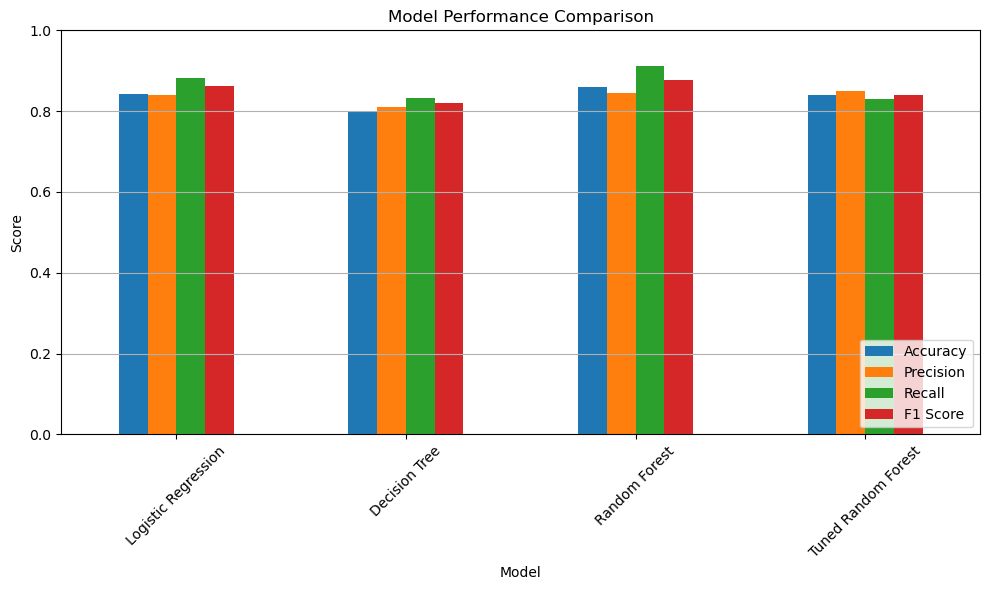

In [72]:
#Visualizing the Metrices

import matplotlib.pyplot as plt

df_metrics.set_index('Model', inplace=True)
df_metrics.plot(kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


**Summary:**

Among the baseline models, Random Forest achieved the best overall performance with the highest accuracy (85.9%) and F1 score (0.877). After hyperparameter tuning, the Tuned Random Forest showed a slight decrease in accuracy (84.0%) and recall for the positive class but balanced precision and recall better, indicating a trade-off due to model complexity constraints. Logistic Regression and Decision Tree models performed reasonably well but were outperformed by Random Forest variants. The tuned model’s balanced metrics suggest it is more reliable in minimizing false positives and false negatives, crucial in medical diagnosis applications such as heart disease risk prediction.

**Discussion/Conclusion**

Random Forest outperformed Logistic Regression and Decision Tree with 85.9% accuracy and an F1 score of 0.877. Hyperparameter tuning slightly lowered accuracy to 84.0% but improved the balance between precision and recall, which is vital for medical diagnosis. The tuning constrained model complexity, causing a minor drop in recall for the negative class.

The tuned Random Forest model offers a balanced and reliable prediction for heart disease risk, minimizing false positives and negatives. However, further validation on larger datasets is needed before real-world use.

**Future Improvements**

- Using larger and more diverse data for better generalization.

- Exploring additional features or dimensionality reduction.

- Handling class imbalance with advanced techniques.

- Testing other models like XGBoost or neural networks.
